In [1]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from PIL import Image
import re
import random

In [8]:
img_folder = "../additional/data/"
genres = ["hip_hop", "electro"]

sample_duration = 30*1000 # 30 secs

if not os.path.exists(join(img_folder, "train/")):
    os.makedirs(join(img_folder, "train/"))
    
if not os.path.exists(join(img_folder, "test/")):
    os.makedirs(join(img_folder, "test/"))

    
for genre in genres:
    if not os.path.exists(join(img_folder, "train", genre, "/")):
        os.makedirs(join(img_folder, "train", genre, "/"))
        
    song_folder = join(img_folder, genre, "/mp3_files/")

    song_files = [f for f in listdir(song_folder) if isfile(join(song_folder, f))]

    for f in song_files:
        song = AudioSegment.from_mp3(join(song_folder, f))

        for segment in range(0, len(song) - sample_duration, sample_duration):
            sample_start = segment
            sample_end = segment + sample_duration

            sample = song[sample_start:sample_end]
            sample = sample.raw_data
            sample = np.fromstring(sample, 'Int16')

            sample = np.convolve(sample, np.ones((1*1000,))/(1*1000), mode='valid')

            plt.figure()
            plt.plot(sample)

            test_pic = np.random.choice([True, False], p=[0.2, 0.8])

            if test_pic is True:
                plt.savefig(join(img_folder, "test", re.sub(r'\W+', '', f) + '.jpg'))
            else:
                plt.savefig(join(img_folder, "train", genre, re.sub(r'\W+', '', f) + str(segment//1000) + '.jpg'))


            plt.close()

/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/home/jharmse/anaconda3/lib/pytho

OSError: [Errno 12] Cannot allocate memory

In [6]:
list(range(0, 5, 2))

[0, 2, 4]

/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/home/jharmse/anaconda3/lib/pytho

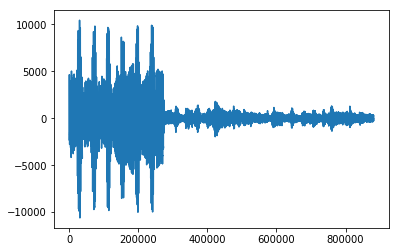

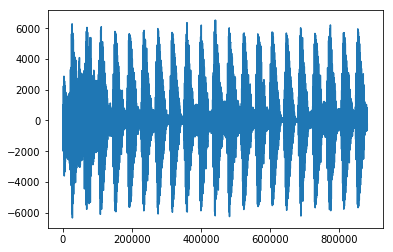

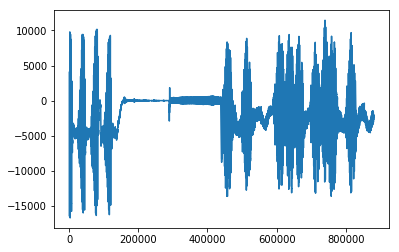

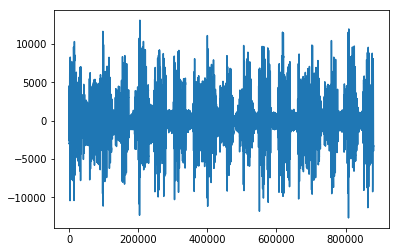

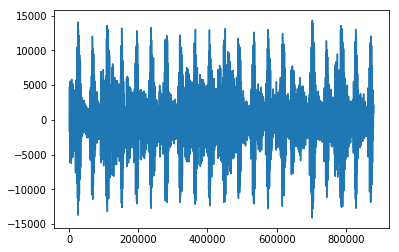

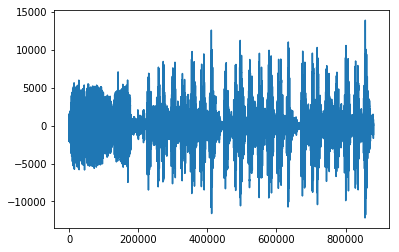

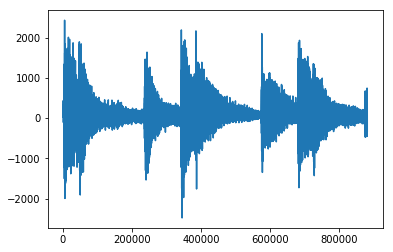

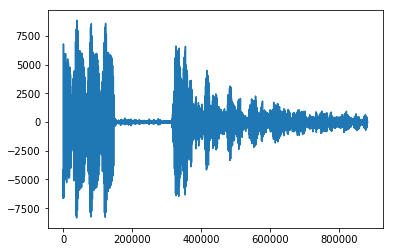

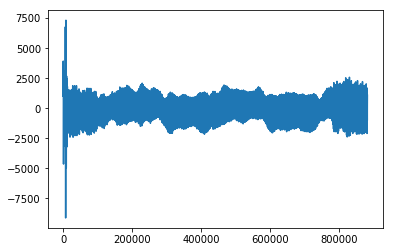

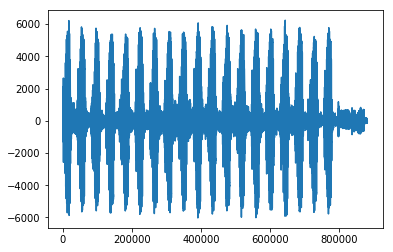

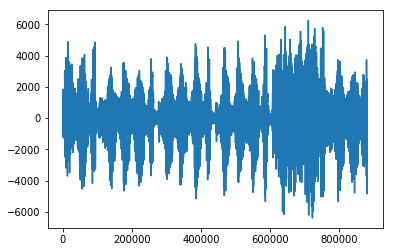

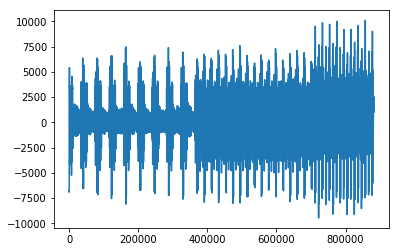

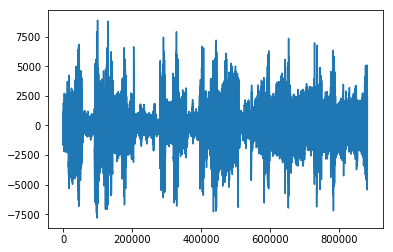

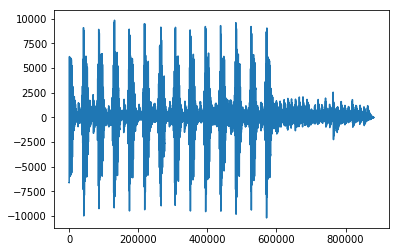

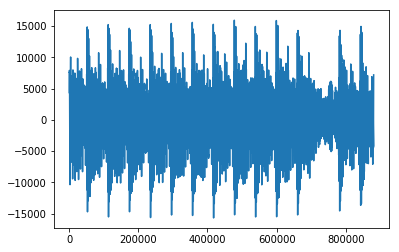

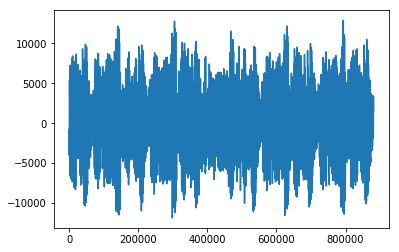

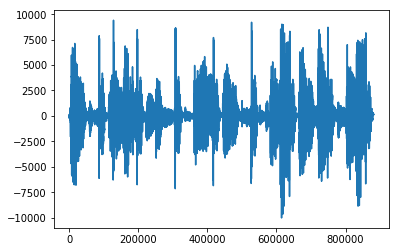

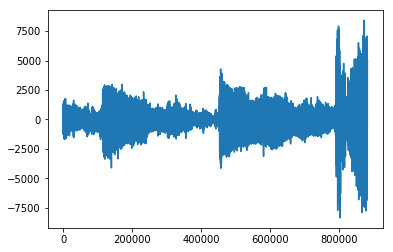

In [30]:
# electro

song_folder = "../additional/data/electro/mp3_files/"
img_folder = "../additional/data/electro/img/"

if not os.path.exists(join(img_folder, "png/")):
    os.makedirs(join(img_folder, "png/"))
    
if not os.path.exists(join(img_folder, "jpg/")):
    os.makedirs(join(img_folder, "jpg/"))

song_files = [f for f in listdir(song_folder) if isfile(join(song_folder, f))]

for f in song_files:
    song = AudioSegment.from_mp3(join(song_folder, f))
    song_middle = len(song)//2
    sample_duration = 10*1000 # 30 secs
    sample_start = song_middle - sample_duration/2
    sample_end = song_middle + sample_duration/2
    song = song[sample_start:sample_end]
    song = song.raw_data
    song = np.fromstring(song, 'Int16')

    song = np.convolve(song, np.ones((1*1000,))/(1*1000), mode='valid')

    plt.figure()
    plt.plot(song)
    plt.savefig(join(img_folder, "png", f + '.png'))
    
    img = Image.open(join(img_folder, "png", f + '.png'))
    img = img.convert('RGB')
    
    img.save(join(img_folder, "jpg", re.sub(r'\W+', '', f) + '.jpg'),'JPEG')
#     plt.show()